### **PCOS or polycystic ovary syndrome :**
 PCOS is a hormonal imbalance that affects ovulation. This can cause irregular periods, excess androgen, and cysts in the ovaries. It's a common condition, affecting about 1 in 10 women of childbearing age.

 PCOS Dataset Source : https://www.kaggle.com/datasets/cm037divya/pcos-dataset


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing libraries**

In [2]:
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import  linear_model

In [3]:
shutil.copytree("/content/drive/MyDrive/PCOS","/content/PCOS")

'/content/PCOS'

# **Reading the dataset using pandas**

In [4]:
dataset = pd.read_csv("/content/PCOS/PCOS_extended_dataset.csv").iloc[:1000]

# **Analysis of Dataset**

In [5]:
dataset.head(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,193,193,0,30,69.979147,167.708055,23.185569,12,72,22,...,1,0.0,1,105.483401,76.096379,2,4,10.0,13.0,6.176029
1,360,360,0,36,63.711688,154.055877,25.441392,13,70,18,...,1,0.0,1,115.883740,79.117243,2,3,13.0,11.0,6.824718
2,10,10,0,36,51.848631,149.059804,23.928264,15,80,20,...,0,0.0,0,112.219711,80.919417,1,1,14.0,17.0,2.568691
3,278,278,1,29,66.893988,148.628036,27.894935,15,72,18,...,0,0.0,1,104.619624,69.902681,1,1,12.0,14.0,9.962732
4,71,71,0,33,52.536198,150.767409,23.079564,13,72,18,...,0,0.0,0,99.175454,70.330461,5,2,11.5,4.7,6.655190
5,473,473,1,26,67.408647,165.951097,25.582907,11,72,18,...,1,1.0,0,104.534763,67.877522,12,14,19.0,18.0,9.346737
6,397,397,0,31,68.703324,159.593469,27.318412,15,72,18,...,1,0.0,0,104.686254,78.572280,4,9,12.0,15.0,6.737614
7,315,315,1,34,52.659470,157.495627,21.512464,11,78,20,...,1,1.0,0,122.344192,81.485462,5,5,12.0,10.0,11.596253
8,487,487,1,30,49.764163,158.961647,19.116393,11,74,18,...,0,1.0,1,112.984942,83.469785,16,16,19.0,19.0,10.648025
9,88,88,0,40,57.576129,156.596777,23.227606,11,80,20,...,0,0.0,0,121.756683,72.242461,11,9,17.0,18.0,4.693380


In [6]:
dataset.tail(10)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
990,212,212,1,39,52.458192,150.382627,25.573858,15,78,20,...,0,1.0,0,122.866969,78.160533,12,11,17.0,14.0,16.206733
991,373,373,1,29,77.646275,159.238423,29.151780,11,72,20,...,0,1.0,0,120.937522,83.932659,12,9,17.0,19.0,8.701674
992,97,97,1,28,69.824355,155.217223,28.955266,16,78,24,...,0,0.0,0,106.635897,69.199110,18,13,17.0,18.0,6.370593
993,483,483,0,32,44.658083,163.097456,17.195030,13,72,22,...,1,1.0,1,112.887102,83.749743,1,3,19.0,19.0,9.041662
994,390,390,0,23,51.762969,154.631469,19.829527,15,72,18,...,0,0.0,1,104.781251,67.285934,3,5,15.0,12.0,10.213667
995,342,342,1,26,63.163356,157.147510,25.899957,15,75,24,...,1,1.0,0,109.967553,78.943615,10,7,10.0,11.0,8.362317
996,281,281,0,31,66.045735,156.476734,25.129615,15,72,18,...,1,0.0,1,121.270402,67.730425,3,3,18.0,15.0,8.199282
997,3,3,1,33,71.981242,164.488526,25.209347,11,72,18,...,1,1.0,0,114.972581,82.067819,13,15,18.0,20.0,9.471003
998,510,510,1,46,52.716341,150.801448,24.558457,13,74,20,...,0,1.0,0,120.869608,72.668433,20,18,18.0,17.0,7.352557
999,456,456,1,32,54.144126,150.114467,22.521351,13,70,18,...,1,0.0,1,107.075579,79.613187,6,7,18.0,18.0,8.505423


# **Getting the dimension of dataset**

In [7]:
rows = dataset.shape[0]
columns = dataset.shape[1]
print("There are",rows,"rows and",columns,"Columns in dataset")

There are 1000 rows and 44 Columns in dataset


# **Getting metadata about data (Datatype of column and count of non-null values)**

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  1000 non-null   int64  
 1   Patient File No.        1000 non-null   int64  
 2   PCOS (Y/N)              1000 non-null   int64  
 3    Age (yrs)              1000 non-null   int64  
 4   Weight (Kg)             1000 non-null   float64
 5   Height(Cm)              1000 non-null   float64
 6   BMI                     1000 non-null   float64
 7   Blood Group             1000 non-null   int64  
 8   Pulse rate(bpm)         1000 non-null   int64  
 9   RR (breaths/min)        1000 non-null   int64  
 10  Hb(g/dl)                1000 non-null   float64
 11  Cycle(R/I)              1000 non-null   int64  
 12  Cycle length(days)      1000 non-null   int64  
 13  Marraige Status (Yrs)   1000 non-null   float64
 14  Pregnant(Y/N)           1000 non-null   i

# **Getting summary statistics of dataset**

In [9]:
dataset.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,268.090000,268.090000,0.30600,31.43700,59.479340,156.411999,24.258543,13.822000,73.299000,19.267000,...,0.49000,0.52000,0.266000,114.790992,77.024030,5.99300,6.398000,14.919500,15.443800,8.556757
std,151.682779,151.682779,0.46106,5.33221,11.513581,5.987084,4.104196,1.806538,4.222491,1.732834,...,0.50015,0.49985,0.442085,6.933679,5.712705,4.23496,4.348161,3.655973,3.247958,2.178447
min,1.000000,1.000000,0.00000,20.00000,30.812935,136.539081,11.939138,11.000000,13.000000,16.000000,...,0.00000,0.00000,0.000000,95.275067,7.680842,0.00000,0.000000,0.000000,0.000000,0.000000
25%,135.000000,135.000000,0.00000,28.00000,52.271758,151.977683,21.781999,13.000000,72.000000,18.000000,...,0.00000,0.00000,0.000000,109.363267,72.433707,3.00000,3.000000,13.000000,13.000000,7.098367
50%,268.000000,268.000000,0.00000,31.00000,58.703142,156.467447,24.202462,14.500000,72.000000,18.000000,...,0.00000,1.00000,0.000000,114.678861,78.256412,5.00000,5.000000,15.000000,16.000000,8.470962
75%,395.000000,395.000000,1.00000,35.00000,65.577065,160.190975,26.576228,15.000000,74.000000,20.000000,...,1.00000,1.00000,1.000000,120.301499,81.117556,8.00000,9.000000,18.000000,18.000000,9.912254
max,541.000000,541.000000,1.00000,48.00000,113.379053,180.388539,40.449415,18.000000,82.000000,28.000000,...,1.00000,1.00000,1.000000,144.980616,104.267012,22.00000,20.000000,24.000000,24.000000,17.409154


# **Printing the columns name of dataset**

In [10]:
print(dataset.columns)

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of abortions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')


# **Cleaning**

In [11]:
dataset_1 = dataset.drop(['Sl. No', 'Patient File No.','Weight (Kg)','Height(Cm) ','Hip(inch)', 'Waist(inch)','Marraige Status (Yrs)'], axis=1)

# **The code drops several columns from the dataset :**

* **Serial Number ("Sl. No")**: Not relevant to PCOS prediction.
* **Patient File Number**: Likely an identifier and not useful for analysis.
* **Weight and Height**: Derivable from the Body Mass Index (BMI) if needed.
* **Hip and Waist (individually)**: Already captured in the hip-to-waist ratio.
* **Marital Status**: No established link between marital status and PCOS.


# **Attributes of Dataset**

1. **PCOS (Y/N)** - Yes (Y) or No (N) indicates presence of Polycystic Ovary Syndrome, a hormonal imbalance affecting ovulation and menstruation.

2. **Age (yrs)** - Your current age in years.

3. **BMI** - Body Mass Index, a measure of weight relative to height, used to screen for potential weight-related health problems.

4. **Blood Group** - A, B, AB, or O blood type, a genetic classification of your blood based on surface molecules.

                      A+ = 11
                      A- = 12
                      B+ = 13
                      B- = 14
                      O+ = 15
                      O- = 16
                      AB+ = 17
                      AB- = 18

5. **Pulse rate(bpm)** - The number of times your heart beats per minute, an indicator of heart function.

6. **RR (breaths/min)** - Respiratory Rate, the number of breaths you take per minute, an indicator of respiratory function.

7. **Hb(g/dl)** - Hemoglobin concentration in your blood, carrying oxygen to your tissues. Lower levels may indicate anemia.

8. **Cycle(R/I)** - Regular (R) or Irregular (I) menstrual cycle.

9. **Cycle length(days)** - Average number of days in your menstrual cycle, important for tracking ovulation and fertility.

10. **Pregnant(Y/N)** - Yes (Y) or No (N) indicating pregnancy status.

11. **No. of abortions** - Number of prior pregnancy terminations, which may influence future fertility.

12. **I beta-HCG(mIU/mL)** - Beta-human chorionic gonadotropin level in the first trimester of pregnancy, a hormone produced by the developing placenta.

13. **II beta-HCG(mIU/mL)** - Beta-human chorionic gonadotropin level in the second trimester of pregnancy, used to monitor fetal development.

14. **FSH(mIU/mL)** - Follicle Stimulating Hormone level, a hormone involved in egg maturation.

15. **LH(mIU/mL)** - Luteinizing Hormone level, a hormone involved in ovulation and egg release.

16. **FSH/LH** - Ratio of FSH to LH levels, which can indicate ovulation problems.

17. **Waist:Hip Ratio** - Ratio of your waist circumference to hip circumference, a body fat distribution measure.

18. **TSH (mIU/L)** - Thyroid Stimulating Hormone level, a hormone regulating your thyroid function and metabolism.

19. **AMH(ng/mL)** - Anti-Müllerian Hormone level, an indicator of remaining eggs in your ovaries and potential fertility.

20. **PRL(ng/mL)** - Prolactin level, a hormone involved in milk production and can affect ovulation.

21. **Vit D3 (ng/mL)** - Vitamin D3 level, important for bone health and may influence fertility.

22. **PRG(ng/mL)** - Progesterone level, a hormone involved in preparing the uterus for pregnancy.

23. **RBS(mg/dl)** - Random Blood Sugar level, a snapshot of your blood sugar at a particular time.

24. **Weight gain(Y/N)** - Yes (Y) or No (N) indicating recent weight gain, which can affect hormone levels and fertility.

25. **hair growth(Y/N)** - Yes (Y) or No (N) indicating excessive hair growth, a potential symptom of PCOS.

26. **Skin darkening (Y/N)** - Yes (Y) or No (N) indicating skin darkening, a potential symptom of hormonal imbalance.

27. **Hair loss(Y/N)** - Yes (Y) or No (N) indicating hair loss, which can be caused by hormonal imbalances.

28. **Pimples(Y/N)** - Yes (Y) or No (N) indicating presence of pimples, a potential symptom of hormonal imbalance.

29. **Fast food (Y/N)** - Yes (Y) or No (N) indicating frequent fast food consumption, which can affect hormone regulation.

30. **Reg.Exercise(Y/N)** - Yes (Y) or No (N) indicating regular exercise routine, which can improve hormonal health.

31. **BP _Systolic (mmHg)** - Systolic blood pressure reading, the top number indicating pressure when your heart beats.

32. **BP _Diastolic (mmHg)** - Diastolic blood pressure reading, the bottom number indicating pressure between heartbeats.

33. **Follicle No. (L)** - Number of follicles on the left ovary, small fluid-filled sacs containing eggs.

34. **Follicle No. (R)** - Number of follicles on the right ovary.

35. **Avg. F size (L) (mm)** - Average size of follicles on the left ovary in millimeters, used to monitor egg development.

36. **Avg. F size (R) (mm)** - Average size of follicles on the right ovary in millimeters, used to monitor egg development.

37. **Endometrium (mm)** - Thickness of the uterine lining in millimeters, which prepares for pregnancy and sheds during menstruation.

# **Checking for NA Values**

In [12]:
dataset_1.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Pregnant(Y/N)             0
No. of abortions          0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)          0
Follicle No. (R)          0
Avg. F size (L) (mm)      0
Avg. F size (R) (mm)

# **Updating column datatypes from object to float**

In [13]:
for col in dataset_1:
    if dataset_1[col].dtypes == object:
      dataset_1[col] = pd.to_numeric(dataset_1[col], errors = "coerce") # The errors="coerce" parameter instructs pandas to convert any values that cannot be converted to numeric to NaN

# **Select all columns except the first ('PCOS(Y/N)') as it represents the target variable**

In [14]:
columns = dataset_1.columns[1:]

# **Create a grid of boxplots to visually inspect the distribution of each feature (excluding target) and identify potential outliers.**

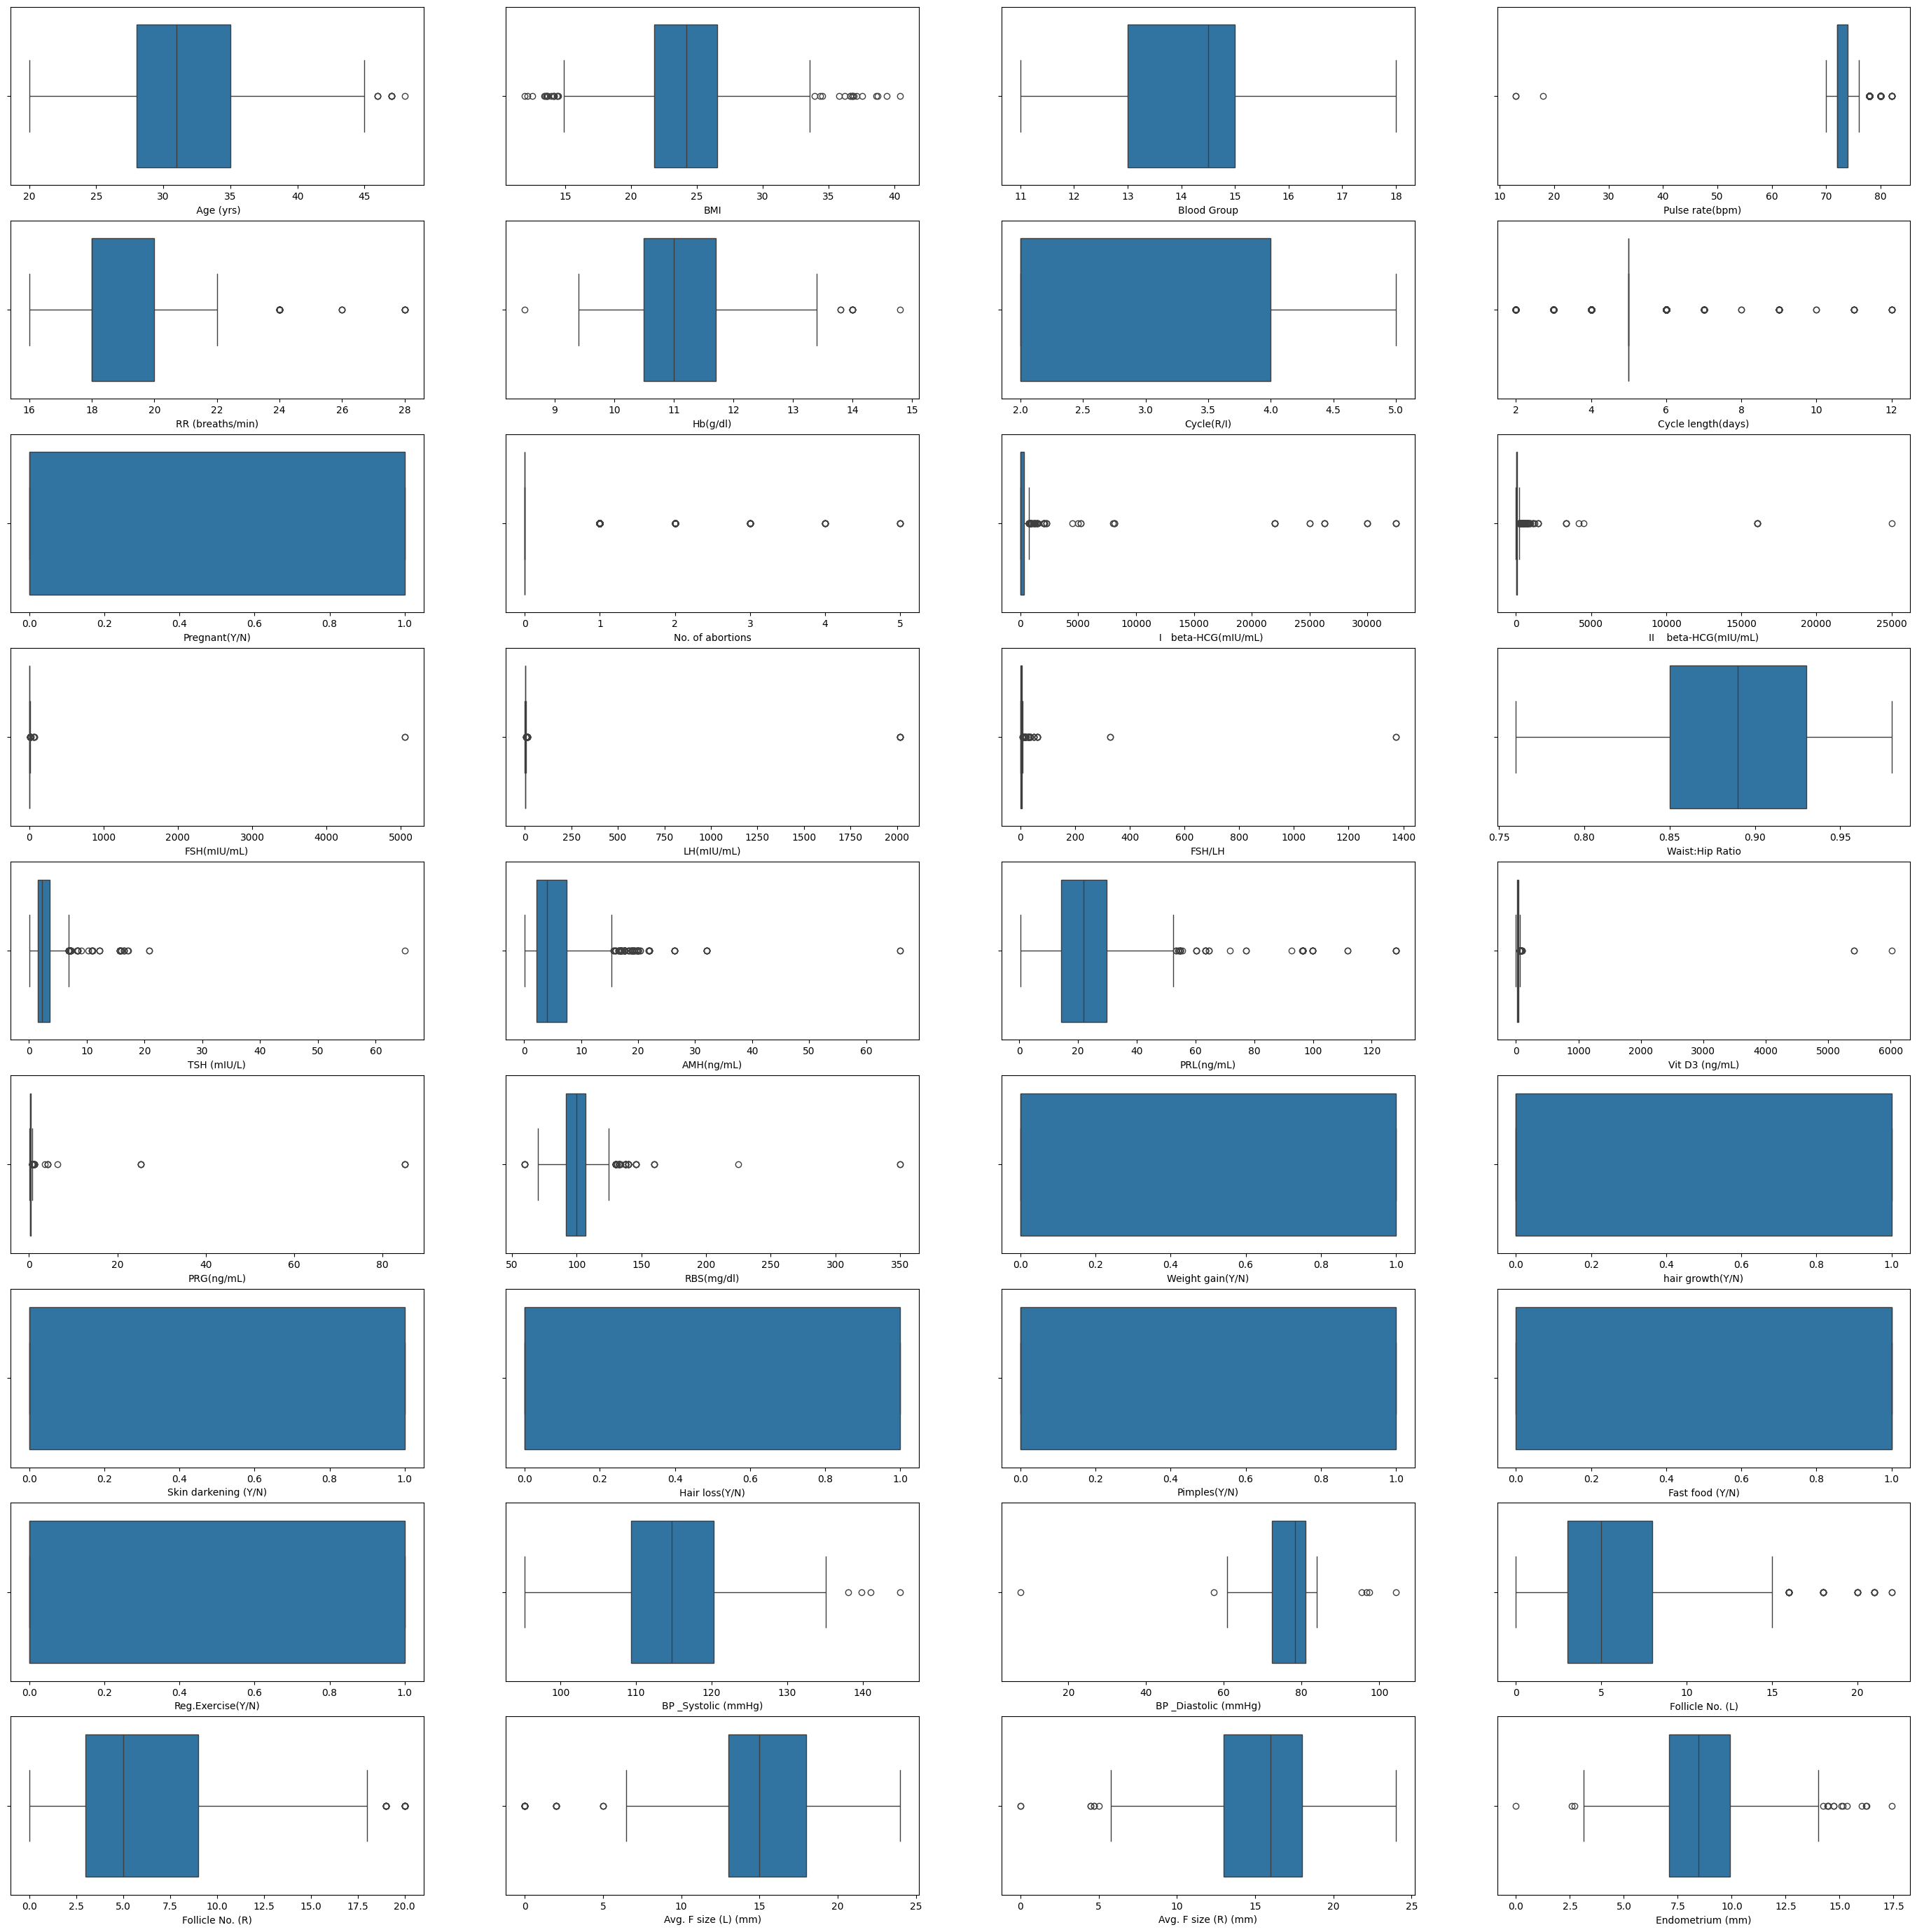

In [15]:
plt.figure(figsize = (35,35))
for i, col in enumerate(columns):
    plt.subplot(9, 4, i+1)
    sns.boxplot(x = dataset_1[col])
plt.show()

# **Calculate pairwise correlation coefficients**

In [16]:
correlation = dataset_1.corr()
correlation

,PCOS (Y/N),Age (yrs),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.172524,0.198268,0.064257,0.101552,0.060513,0.140965,0.382879,-0.208311,-0.001252,...,0.239008,0.351300,0.052076,-0.036604,0.044002,0.591167,0.611762,0.112613,0.114770,0.046390
Age (yrs),-0.172524,1.000000,0.054622,-0.027975,0.043674,0.100678,-0.020119,-0.085960,0.082395,-0.001956,...,-0.016188,0.024697,0.007541,0.147111,0.102057,-0.099824,-0.145061,-0.053162,-0.085556,-0.046009
BMI,0.198268,0.054622,1.000000,0.084297,0.066248,0.087807,0.048803,0.205959,0.020656,-0.051092,...,0.044861,0.173749,-0.116305,0.054338,0.129867,0.117915,0.072506,-0.026147,-0.126066,-0.058728
Blood Group,0.064257,-0.027975,0.084297,1.000000,0.026537,-0.008146,0.061460,0.182450,-0.053621,-0.116792,...,0.064500,0.000621,0.064358,0.003923,0.078235,0.096004,0.067010,-0.027861,-0.014212,0.000084
Pulse rate(bpm),0.101552,0.043674,0.066248,0.026537,1.000000,0.345461,-0.029449,0.133530,-0.015388,0.065599,...,-0.025363,0.105535,-0.035142,-0.046358,-0.033545,0.041037,0.031622,-0.060851,-0.023174,-0.060510
RR (breaths/min),0.060513,0.100678,0.087807,-0.008146,0.345461,1.000000,-0.039508,0.048016,-0.053308,0.030380,...,0.062566,0.172381,-0.064056,0.047195,0.057637,0.072958,0.015376,-0.036975,-0.032742,-0.060122
Hb(g/dl),0.140965,-0.020119,0.048803,0.061460,-0.029449,-0.039508,1.000000,0.064811,-0.078335,-0.051852,...,0.059416,0.105409,0.007364,0.105788,0.031352,0.140241,0.172561,0.002941,0.020217,-0.067837
Cycle(R/I),0.382879,-0.085960,0.205959,0.182450,0.133530,0.048016,0.064811,1.000000,-0.180093,-0.076225,...,0.120093,0.205697,-0.014244,-0.010389,0.078820,0.272947,0.256036,0.011734,0.016065,-0.011984
Cycle length(days),-0.208311,0.082395,0.020656,-0.053621,-0.015388,-0.053308,-0.078335,-0.180093,1.000000,0.075827,...,-0.023668,-0.127668,-0.013483,0.010358,-0.082812,-0.098553,-0.165962,-0.059525,-0.038667,-0.054416
Pregnant(Y/N),-0.001252,-0.001956,-0.051092,-0.116792,0.065599,0.030380,-0.051852,-0.076225,0.075827,1.000000,...,0.159905,0.080000,-0.065649,0.052759,0.015425,0.095719,0.091852,-0.107072,-0.129302,-0.036047


# **Generate a heatmap of the correlation matrix with annotations**

<Axes: >

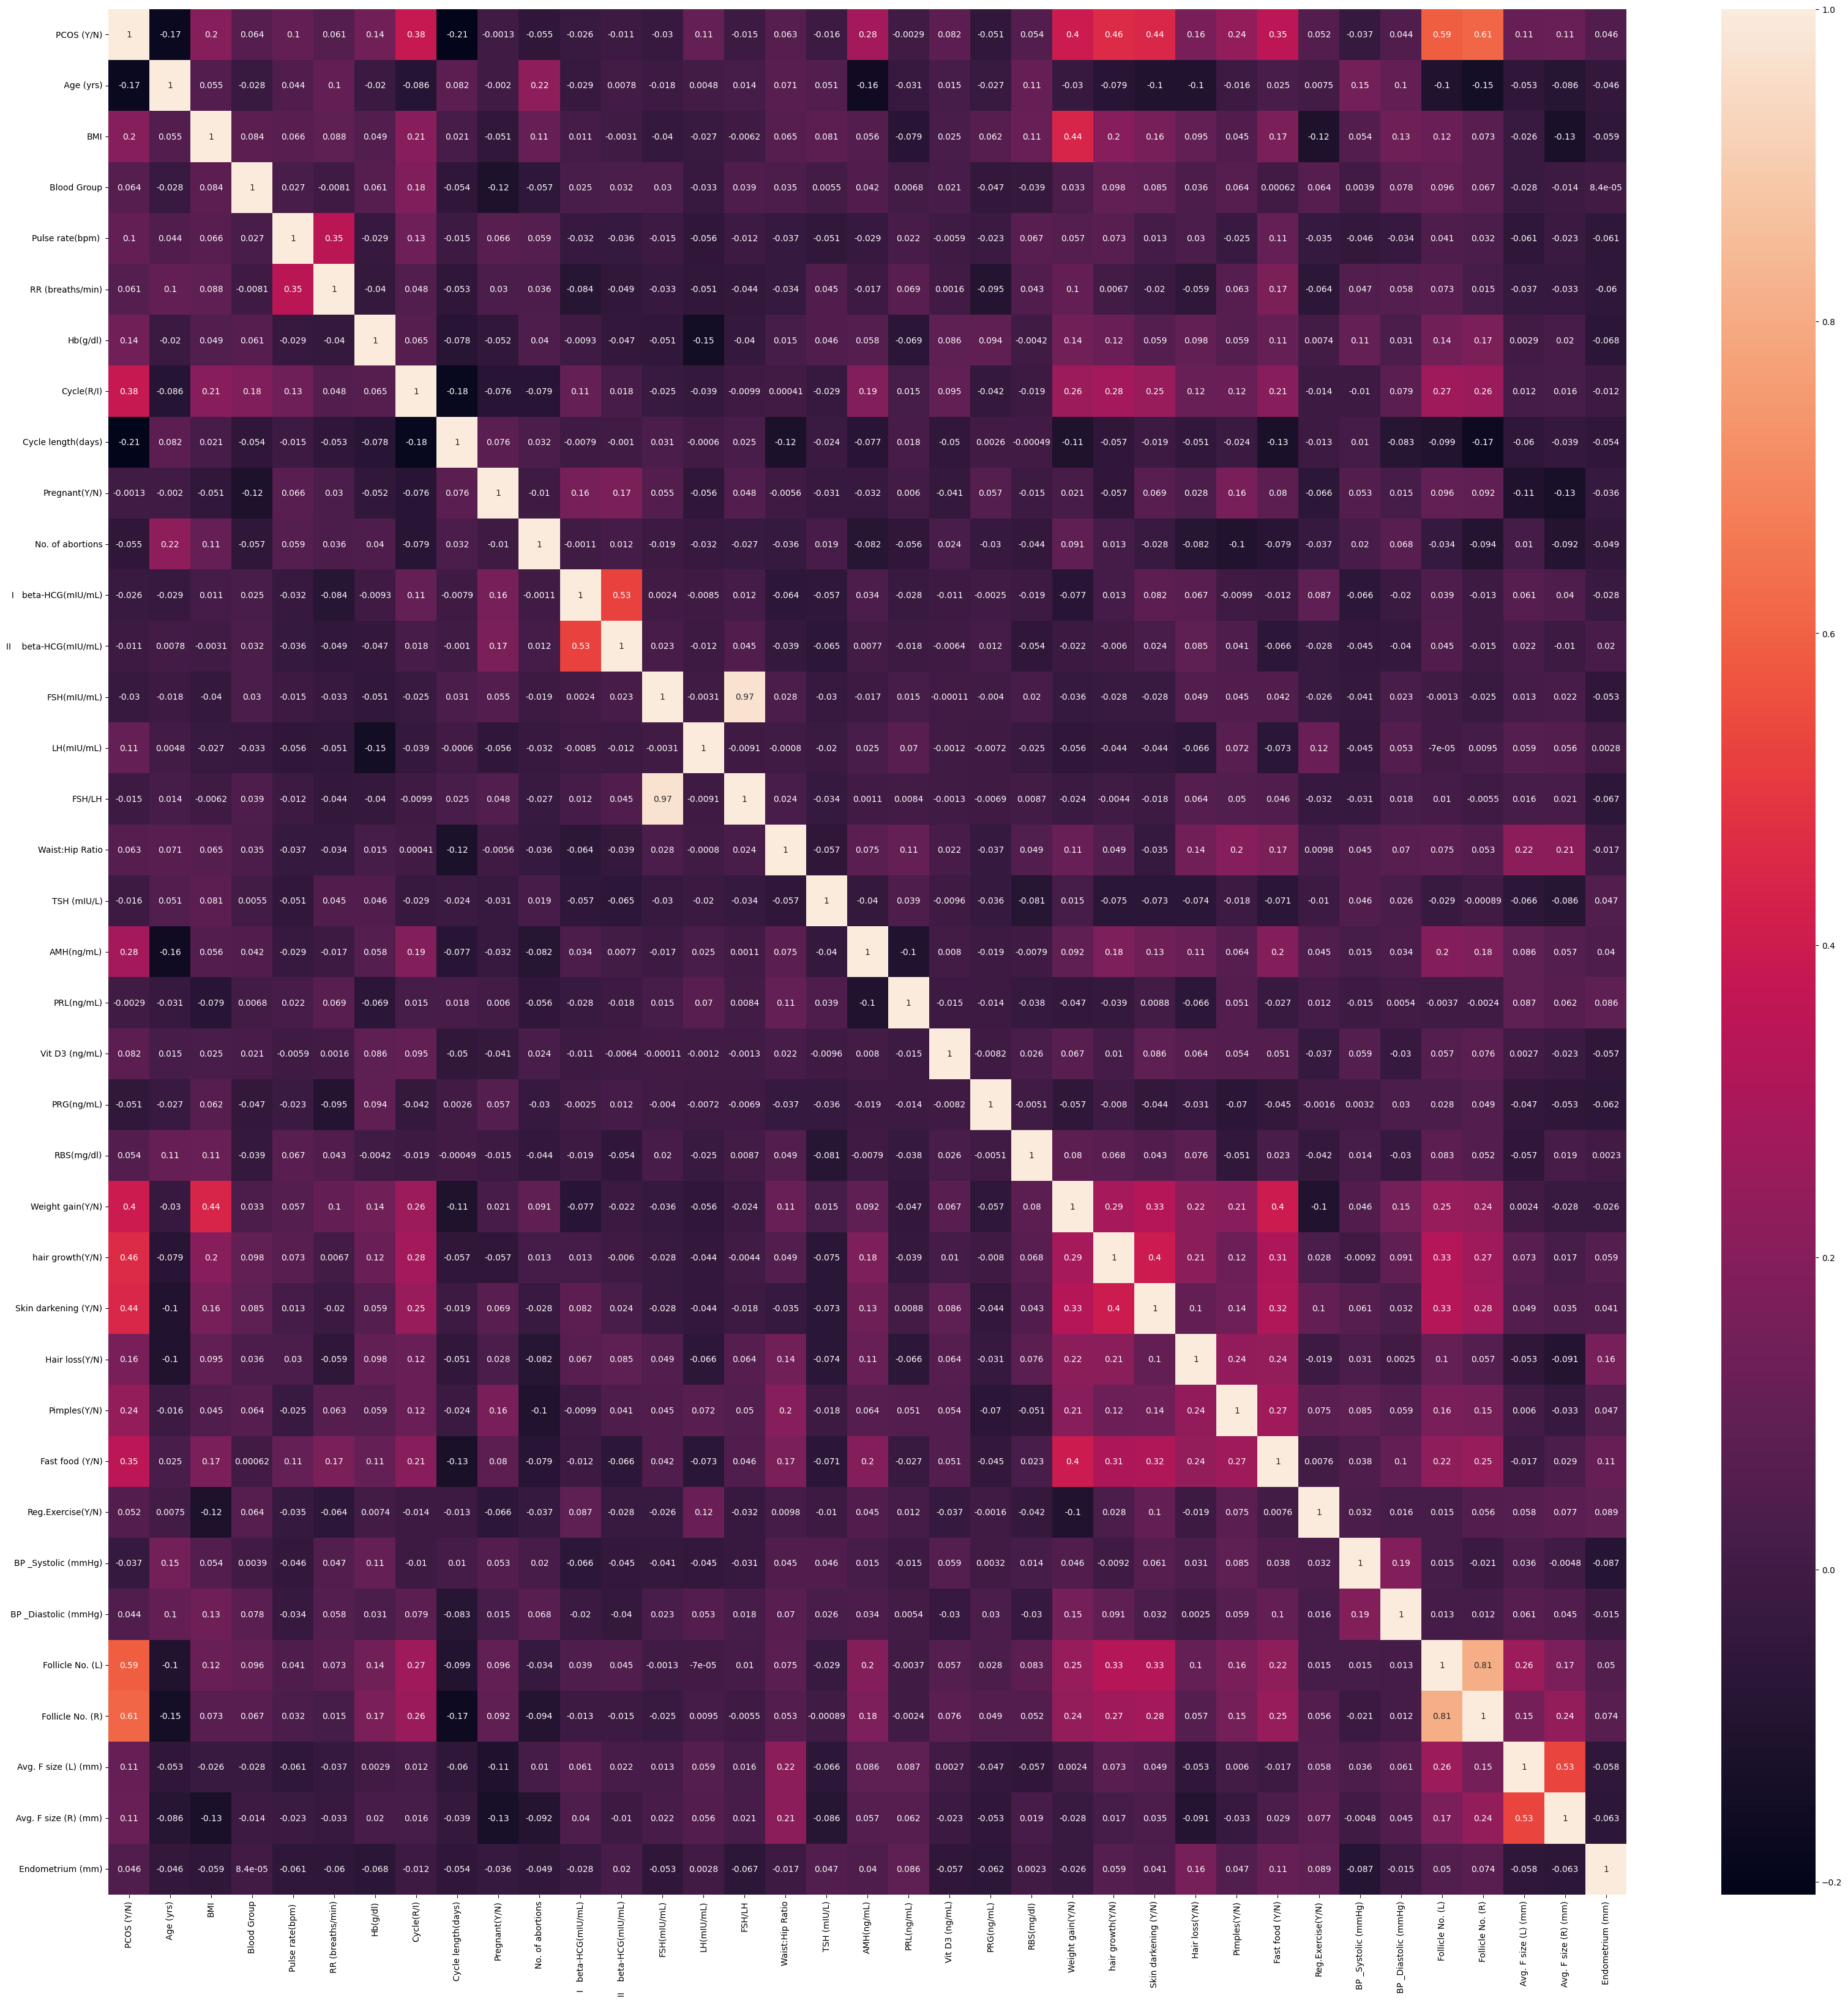

In [17]:
plt.figure(figsize = (40,40))
sns.heatmap(correlation, annot=True)   # it's a 37x37 correlation matrix,

# **Removing the outliers from the dataset**

In [18]:
outliers_columns = ['Pulse rate(bpm) ','FSH(mIU/mL)','LH(mIU/mL)','FSH/LH','TSH (mIU/L)','Vit D3 (ng/mL)','BP _Systolic (mmHg)','BP _Diastolic (mmHg)','Endometrium (mm)']
lower_range = [60,0,0.05,0.39,0.4,5,80,50,1]
upper_range = [100,4000,30,17,7,90,145,105,19]

###   <br> <tab> Outliers Ranges
* 'FSH/LH' normally between 1 and 2 , pcos case: 1:3 or more so taking between 0.39 to 17
* upper wishker range of TSH (mIU/L) comes to be nearly 6.84 roundoff to 7
* AMH(ng/mL) range 2to 6.8 but Lower numbers (less than 1 ng/mL) may indicate a woman with diminished ovarian reserve (DOR).
<br>
<img src='https://drive.google.com/uc?id=1f3TD8DjB4qhB4pfkE7ba9fi8HtPFi16L'>
<br>
* vit D3 Levels of 50 nmol/L (20 ng/mL) or above are adequate for most people for bone and overall health. Levels below 30 nmol/L (12 ng/mL) are too low and might weaken your bones and affect your health. Levels above 125 nmol/L (50 ng/mL) are too high and might cause health problems.


In [19]:
outliers_df = pd.DataFrame({'Columns': outliers_columns, 'Lower Range': lower_range, 'Upper Range': upper_range})
print(outliers_df.to_string())

                Columns  Lower Range  Upper Range
0      Pulse rate(bpm)         60.00          100
1           FSH(mIU/mL)         0.00         4000
2            LH(mIU/mL)         0.05           30
3                FSH/LH         0.39           17
4           TSH (mIU/L)         0.40            7
5        Vit D3 (ng/mL)         5.00           90
6   BP _Systolic (mmHg)        80.00          145
7  BP _Diastolic (mmHg)        50.00          105
8      Endometrium (mm)         1.00           19


In [20]:
def get_outliers_index(data, lower, upper):
  store=[]
  for i in range(len(data)):
    if (data[i]>upper or data[i]<lower):
      store.append(i)
  return store

In [21]:
outlier_index=[]
for i in range(len(outliers_columns)):
  data=outliers_columns[i]
  lower=lower_range[i]
  upper=upper_range[i]
  indexes=get_outliers_index(dataset_1[data], lower, upper)
  for j in indexes:
    if j not in outlier_index:
      outlier_index.append(j)

print("Total number of Outliers found : ", len(outlier_index))

Total number of Outliers found :  103


In [22]:
Cleaned_Dataset = dataset_1.drop(outlier_index)

#**Cleaned Dataset**

In [23]:
rows = Cleaned_Dataset.shape[0]
columns = Cleaned_Dataset.shape[1]
print("There are", rows, "rows and", columns, "Columns in Cleaned Dataset")

There are 897 rows and 37 Columns in Cleaned Dataset


<Axes: >

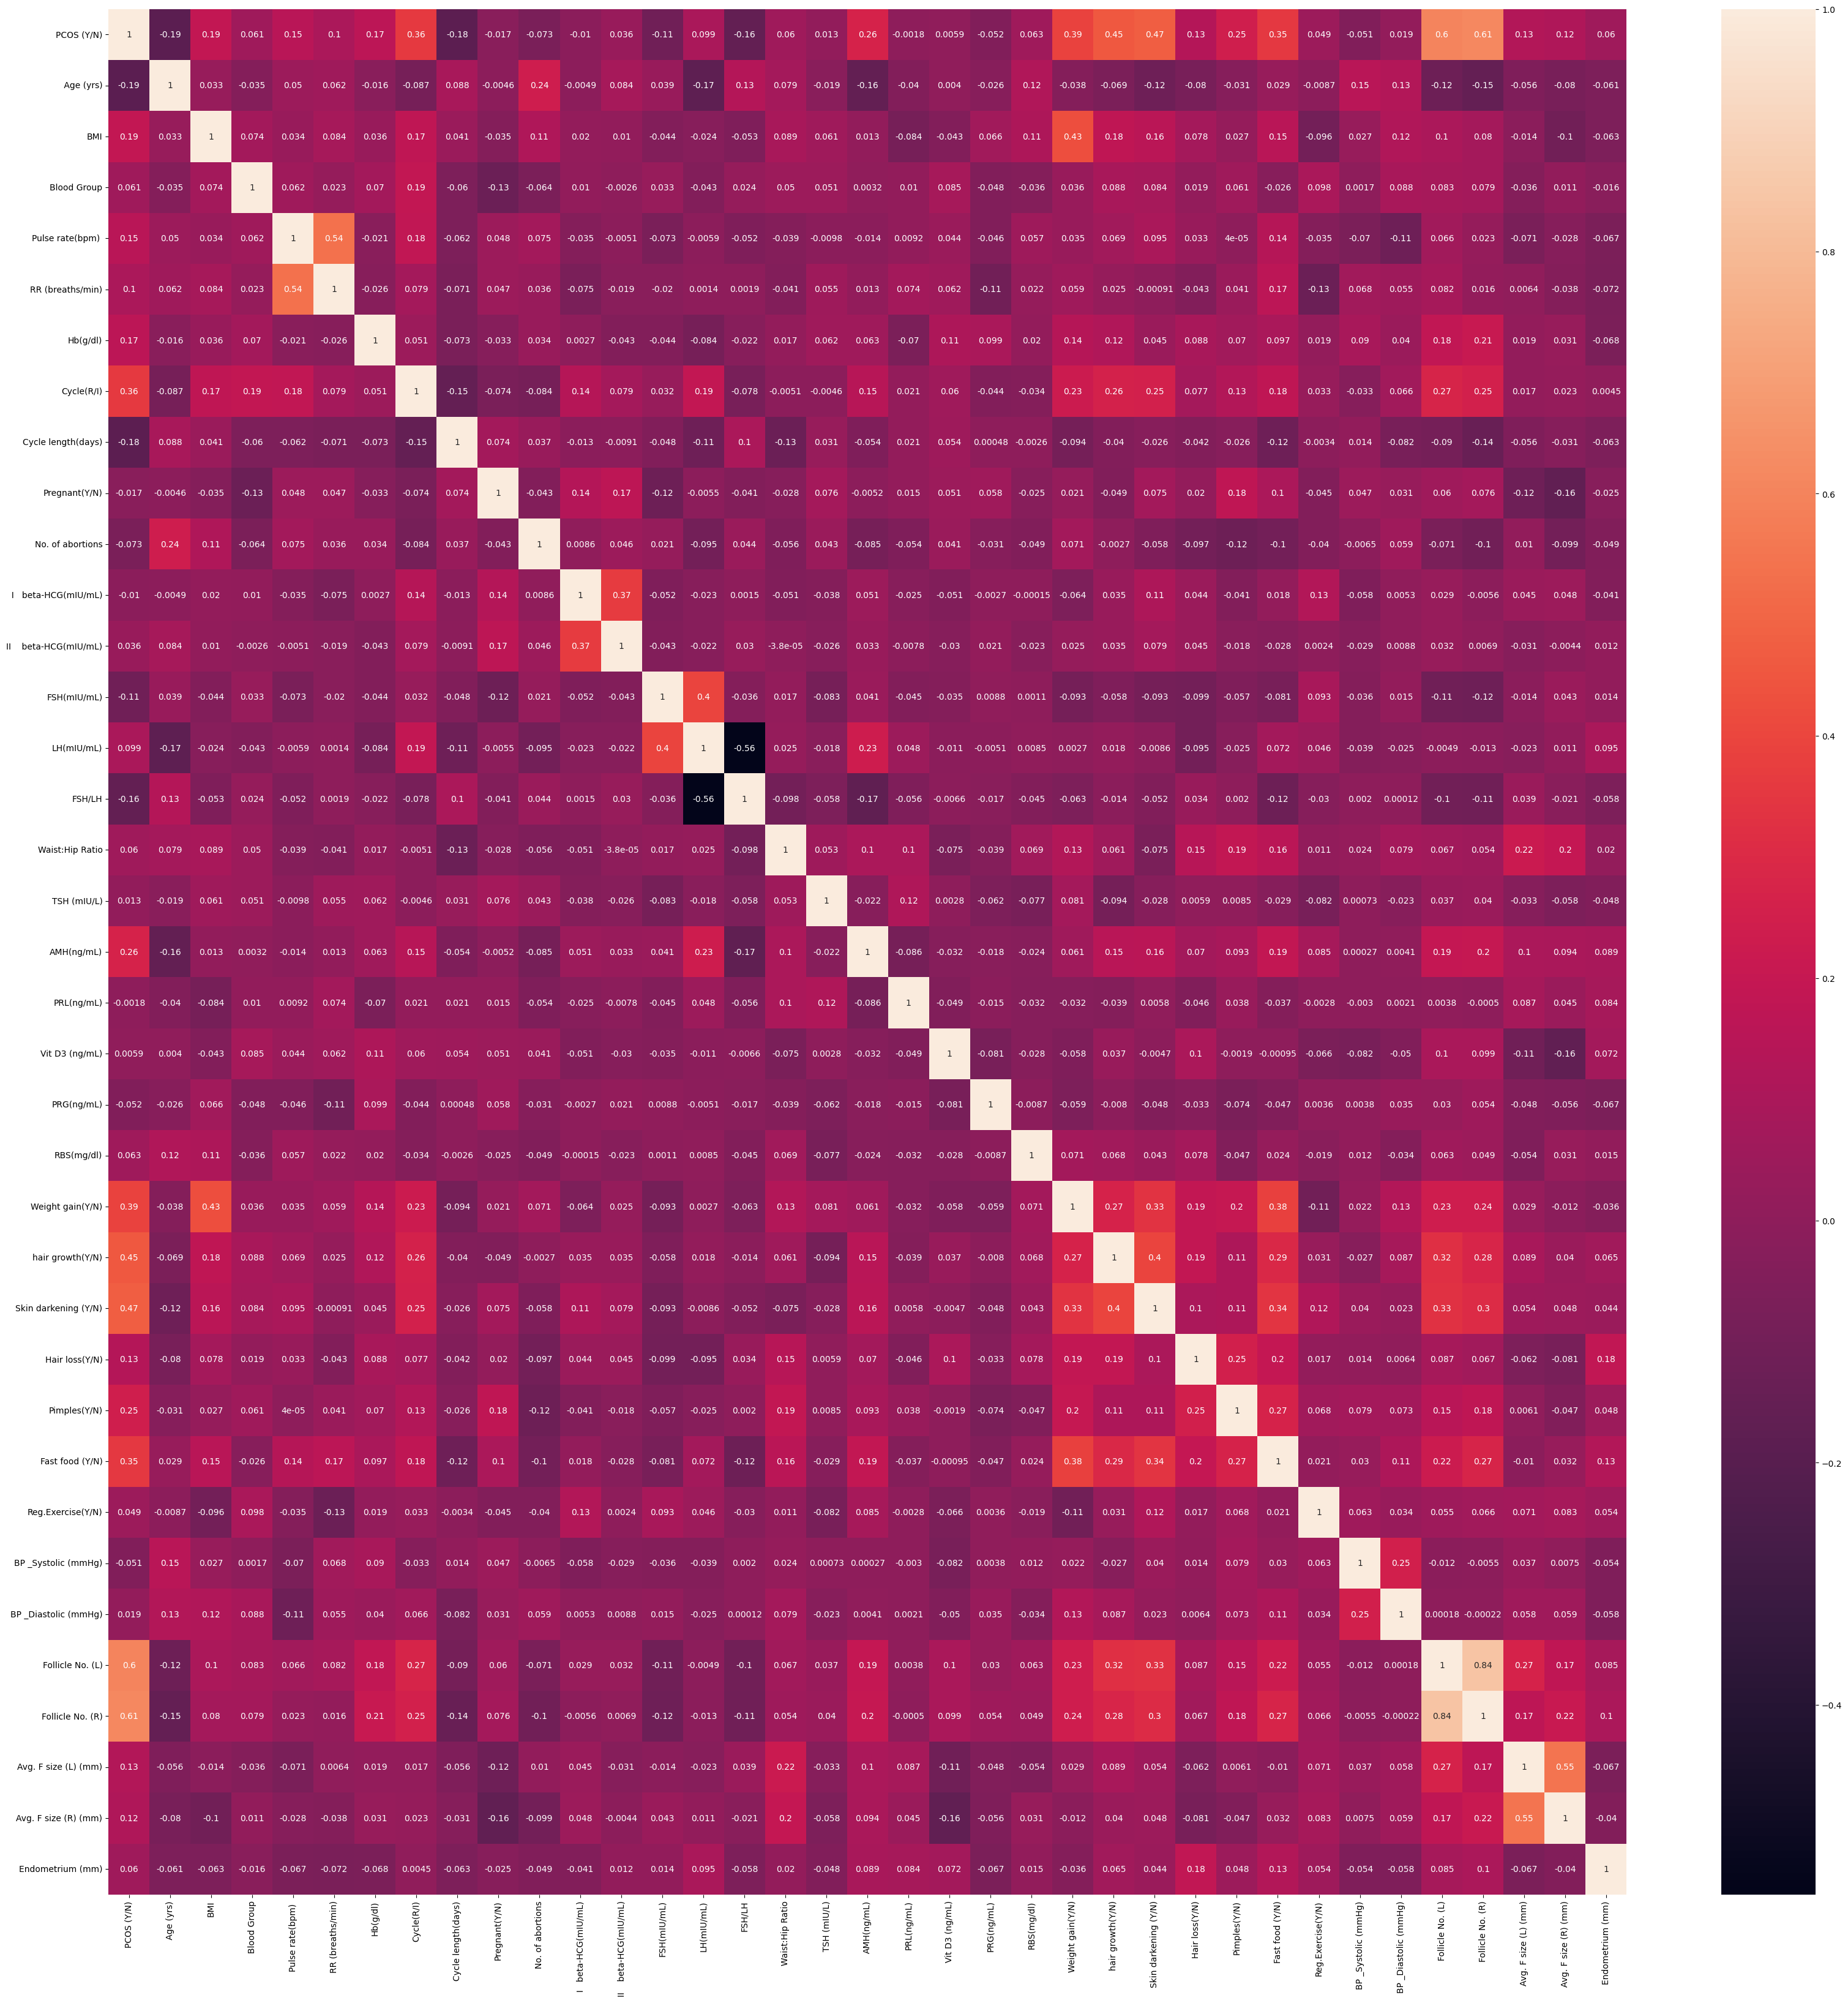

In [24]:
plt.figure(figsize = (40,40))
sns.heatmap(Cleaned_Dataset.corr(), annot=True)   # it's a 37x37 correlation matrix,

## **Splitting Dataset**

In [25]:
Dataset = Cleaned_Dataset.dropna()
X=Dataset.iloc[:,1:].values # Independent variables
Y=Dataset.iloc[:,0].values # Target variable

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [27]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### **Implementing ANN**

In [28]:
ann_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
ann_model.build(input_shape=(1,36))
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 16)                   592       
                                                                 
 dense_1 (Dense)             (1, 1)                    17        
                                                                 
Total params: 609 (2.38 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
ann_model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann_model.fit(X_train,Y_train,epochs=70,batch_size=32)
Model_Name=[]
Accuracy_Model=[]

Epoch 1/70
23/23 [==============================] - 1s 3ms/step - loss: 1.0359 - accuracy: 0.3911
Epoch 2/70
23/23 [==============================] - 0s 3ms/step - loss: 0.8520 - accuracy: 0.5000
Epoch 3/70
23/23 [==============================] - 0s 3ms/step - loss: 0.7113 - accuracy: 0.5880
Epoch 4/70
23/23 [==============================] - 0s 3ms/step - loss: 0.6062 - accuracy: 0.6522
Epoch 5/70
23/23 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.6997
Epoch 6/70
23/23 [==============================] - 0s 3ms/step - loss: 0.4669 - accuracy: 0.7598
Epoch 7/70
23/23 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8184
Epoch 8/70
23/23 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8520
Epoch 9/70
23/23 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8659
Epoch 10/70
23/23 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8813
Epoch 11/70
23/23 [

6/6 [==============================] - 0s 3ms/step - loss: 0.1472 - accuracy: 0.9385
Loss: 0.14717358350753784
Accuracy: 0.9385474920272827
6/6 [==============================] - 0s 2ms/step


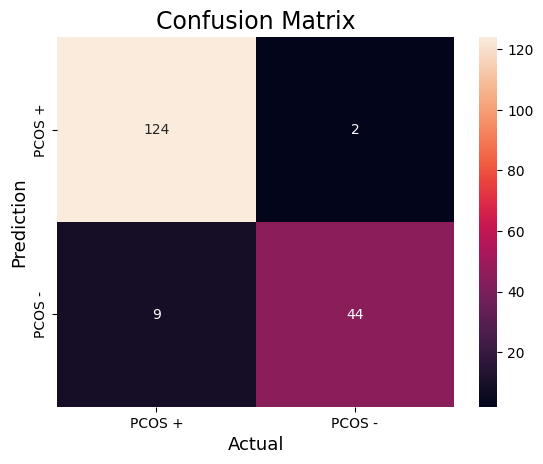

In [30]:
loss, accuracy = ann_model.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)
predicted=ann_model.predict(X_test)
predicted = [1 if x > 0.5 else 0 for x in predicted.flatten()]
cm = confusion_matrix(Y_test,predicted)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


Model_Name.append('ANN')
Accuracy_Model.append(accuracy)

pickle.dump(ann_model, open("ANN_Model.sav", 'wb'))

# **Implementing SVM**

In [31]:
kernel_Name=[ 'linear', 'sigmoid', 'rbf', 'poly']
Differ_Kernel_Accuracy=[]

for Kernel in kernel_Name:
  classifier=SVC(kernel=Kernel)
  classifier.fit(X_train,Y_train)
  predicted=classifier.predict(X_test)
  Differ_Kernel_Accuracy.append(accuracy_score(Y_test,predicted))

In [32]:
SVM_Accuracy = pd.DataFrame({'Kernel USed': kernel_Name, 'Accuracy': Differ_Kernel_Accuracy})
print(SVM_Accuracy.to_string())

  Kernel USed  Accuracy
0      linear  0.905028
1     sigmoid  0.871508
2         rbf  0.938547
3        poly  0.916201


SVM gives Max accuracy of  0.9385474860335196  with kernel  rbf 



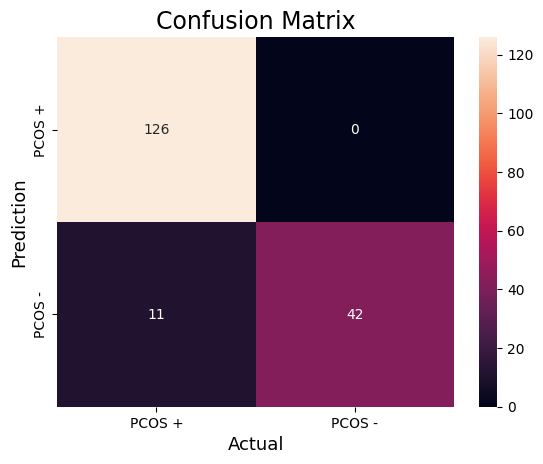

In [33]:
print("SVM gives Max accuracy of ",max(Differ_Kernel_Accuracy)," with kernel ",kernel_Name[np.array(Differ_Kernel_Accuracy).argmax()],"\n")
SVM_Model=SVC(kernel=kernel_Name[np.array(Differ_Kernel_Accuracy).argmax()])
SVM_Model.fit(X_train, Y_train)
predicted=SVM_Model.predict(X_test)
cm = confusion_matrix(Y_test, predicted)
sns.heatmap(cm,
			annot=True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()


Model_Name.append('SVM')
Accuracy_Model.append(max(Differ_Kernel_Accuracy))

pickle.dump(SVM_Model, open("SVM_Model.sav", 'wb'))

# **Implementing Naive Bayes Classifier**

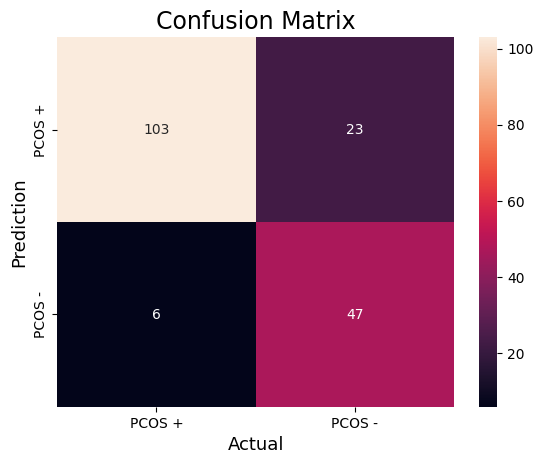

Accuracy :  0.8379888268156425


In [34]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, Y_train)

y_pred = gnb_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)

Model_Name.append('Naive Bayes')
Accuracy_Model.append(accuracy)

pickle.dump(gnb_model, open("NBC_Model.sav", 'wb'))

# **Implementing the Decision Tree Model**

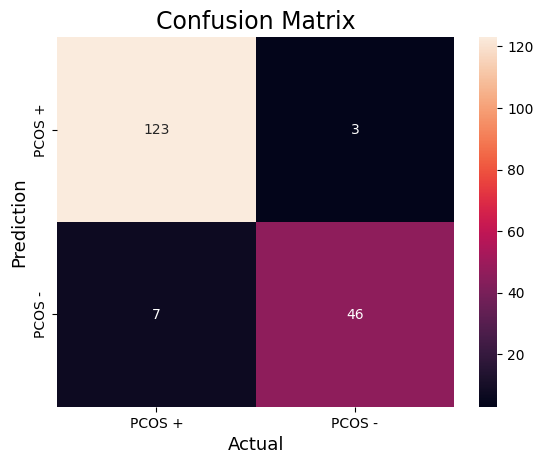

Accuracy :  0.9441340782122905


In [35]:
DT_Model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DT_Model.fit(X_train, Y_train)

y_pred = DT_Model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)

Model_Name.append('Decision Tree')
Accuracy_Model.append(accuracy)
pickle.dump(DT_Model, open("DT_Model.sav", 'wb'))

# **Implementing Random Forest Model**

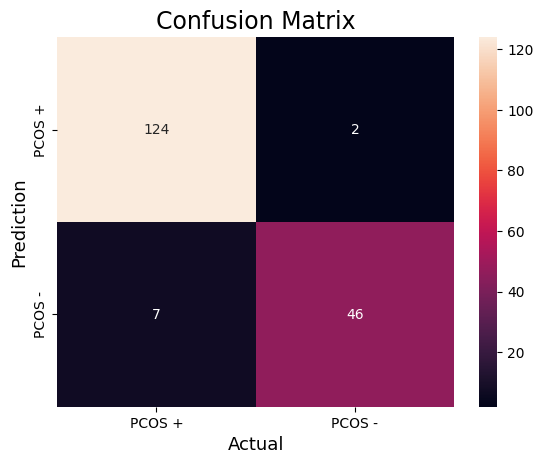

Accuracy :  0.9497206703910615


In [36]:
RF_model = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
RF_model.fit(X_train, Y_train)

y_pred = RF_model.predict(X_test)

cm = confusion_matrix(Y_test, y_pred)

sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(y_pred, Y_test)
print('Accuracy : ', accuracy)


Model_Name.append('Random Forest')
Accuracy_Model.append(accuracy)

pickle.dump(RF_model, open("RF_model.sav", 'wb'))

In [37]:
Models = pd.DataFrame({'Model Name': Model_Name, 'Accuracy': Accuracy_Model})
print(Models.to_string())

      Model Name  Accuracy
0            ANN  0.938547
1            SVM  0.938547
2    Naive Bayes  0.837989
3  Decision Tree  0.944134
4  Random Forest  0.949721


In [38]:
# shutil.rmtree('/content/Models')

In [39]:
os.mkdir('/content/Models')
shutil.copy('/content/ANN_Model.sav','/content/Models/ANN_Model.sav')
shutil.copy('/content/DT_Model.sav','/content/Models/DT_Model.sav')
shutil.copy('/content/NBC_Model.sav','/content/Models/NBC_Model.sav')
shutil.copy('/content/RF_model.sav','/content/Models/RF_Model.sav')
shutil.copy('/content/SVM_Model.sav','/content/Models/SVM_Model.sav')

'/content/Models/SVM_Model.sav'

In [40]:
shutil.copytree('/content/Models','/content/drive/MyDrive/PCOS/Models')

'/content/drive/MyDrive/PCOS/Models'

In [41]:
#Loading Models
ANN_Model = pickle.load(open('/content/Models/ANN_Model.sav', 'rb'))
DT_Model = pickle.load(open('/content/Models/DT_Model.sav', 'rb'))
NBC_Model = pickle.load(open('/content/Models/NBC_Model.sav', 'rb'))
RF_Model = pickle.load(open('/content/Models/RF_Model.sav', 'rb'))
SVM_Model = pickle.load(open('/content/Models/SVM_Model.sav', 'rb'))


**Taking top 3 Models,i.e. Random Forest, ANN, Decision Tree**

6/6 [==============================] - 0s 2ms/step


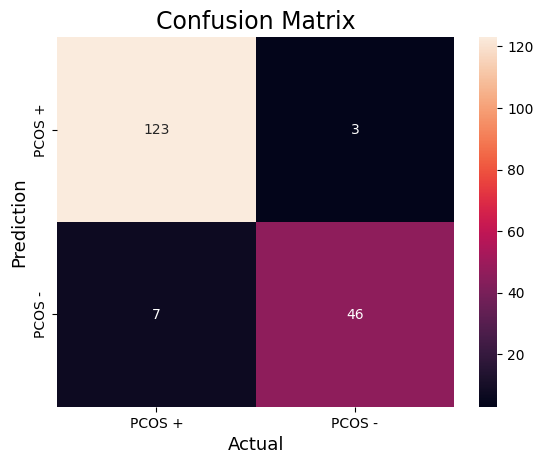

Accuracy of Voting Model is :  0.9441340782122905


In [42]:
#Implementing Voting
Ann_Predicted=ann_model.predict(X_test)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_test)
DT_predicted= DT_Model.predict(X_test)
hybrid_Pred=[]
for i in range(len(Ann_Predicted)):
  prediction=[]
  prediction.append(Ann_Predicted[i])
  prediction.append(RF_Predicted[i])
  prediction.append(DT_predicted[i])
  hybrid_Pred.append(max(set(prediction), key=prediction.count))

cm = confusion_matrix(Y_test, hybrid_Pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

accuracy = accuracy_score(hybrid_Pred, Y_test)
print('Accuracy of Voting Model is : ', accuracy)

23/23 [==============================] - 0s 2ms/step
Coefficients:  [ 1.65936705e-15 -3.33066907e-16  1.00000000e+00]


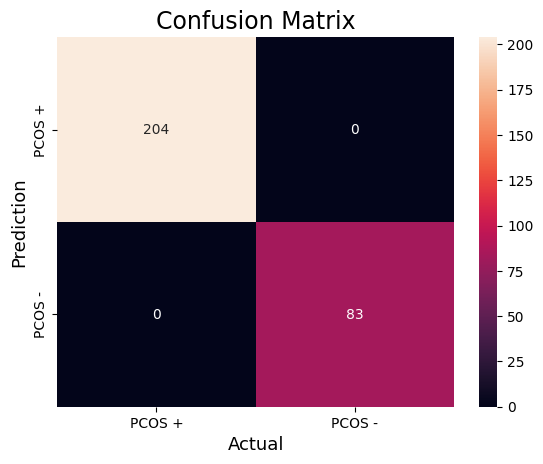

Accuracy of linear Regression Model is :  1.0


In [43]:
#Implementing Stacked Generalization

Dataset = Cleaned_Dataset.dropna()
X=Dataset.iloc[:,1:].values
Y=Dataset.iloc[:,0].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
sc=StandardScaler()
X_temp=sc.fit_transform(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)


Ann_Predicted=ann_model.predict(X_train)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_train)
DT_Predicted= DT_Model.predict(X_train)

#Creating Dataset for meta Model
Stacked_Dataset = pd.DataFrame({'Result': Y_train,'ANN': Ann_Predicted, 'RF': RF_Predicted, 'DT': DT_Predicted})
X = np.hstack([Stacked_Dataset.iloc[:,1:].values])
Y=Stacked_Dataset.iloc[:,0].values
x_train, x_test,y_train, y_test = train_test_split(X, Y,test_size=0.4,random_state=1)
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print('Coefficients: ', reg.coef_)

y_pred=reg.predict(x_test)
y_pred = [1 if x > 0.5 else 0 for x in y_pred.flatten()]
#Meta Model Accuracy
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy of linear Regression Model is : ', accuracy)

6/6 [==============================] - 0s 4ms/step


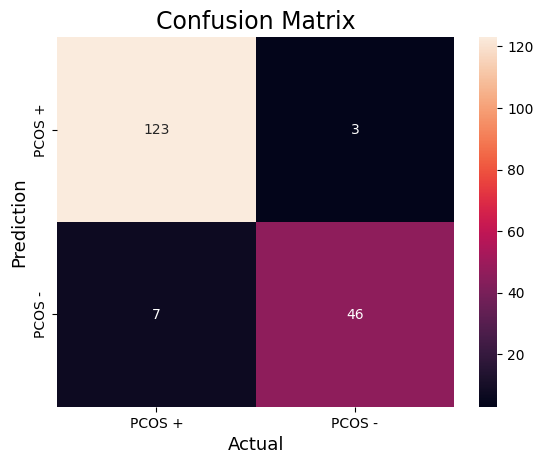

Accuracy of Stacked Generalization Model is :  0.9441340782122905


In [44]:
Ann_Predicted=ann_model.predict(X_test)
Ann_Predicted = [1 if x > 0.5 else 0 for x in Ann_Predicted.flatten()]

RF_Predicted = RF_model.predict(X_test)
DT_Predicted= DT_Model.predict(X_test)
Stacked_Dataset = pd.DataFrame({'Result': Y_test,'ANN': Ann_Predicted, 'RF': RF_Predicted, 'DT': DT_Predicted})
X = np.hstack([Stacked_Dataset.iloc[:,1:].values])
Y=Stacked_Dataset.iloc[:,0].values


Y_Pred=reg.predict(X)
Y_Pred = [1 if x > 0.5 else 0 for x in Y_Pred.flatten()]
#Meta Model Accuracy
cm = confusion_matrix(Y_test, Y_Pred)
sns.heatmap(cm,
			annot = True,
			fmt='g',
			xticklabels=['PCOS +','PCOS -'],
			yticklabels=['PCOS +','PCOS -'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()
accuracy = accuracy_score(Y_Pred, Y_test)
print('Accuracy of Stacked Generalization Model is : ', accuracy)